In [57]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
random_range = numpy.random

#Assigning values to some parameters
learning_rate = 0.01
step_size = 50
epochs = 1000

#Training Data
#train_X = numpy.asarray([1.2,7.2,1.3,7.9,10.657,12.458,2.365,8.54,9.145,10.187,7.1])
#train_Y = numpy.asarray([2.5,4.7,3.1,4.2,5.10,4.1,7.12,9.14,9.52,10.45,7.65])
train_X = numpy.asarray(random_range.randn(150))
train_Y = numpy.asarray(random_range.randn(150))

samples = train_X.shape[0]

In [58]:
# Input to the Graph
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Setting the weights for the model
W = tf.Variable(random_range.randn(), name="weight")
b = tf.Variable(random_range.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Epoch: 0050 cost= 0.747359931 W= 0.586152 b= -0.0265018
Epoch: 0100 cost= 0.616849184 W= 0.357842 b= 0.081333
Epoch: 0150 cost= 0.571138203 W= 0.221899 b= 0.143276
Epoch: 0200 cost= 0.555109203 W= 0.140919 b= 0.178783
Epoch: 0250 cost= 0.549479783 W= 0.09266 b= 0.199091
Epoch: 0300 cost= 0.547498465 W= 0.063887 b= 0.210676
Epoch: 0350 cost= 0.546799183 W= 0.0467239 b= 0.217266
Epoch: 0400 cost= 0.546551168 W= 0.0364813 b= 0.221003
Epoch: 0450 cost= 0.546462655 W= 0.0303658 b= 0.223113
Epoch: 0500 cost= 0.546430707 W= 0.0267126 b= 0.2243
Epoch: 0550 cost= 0.546418905 W= 0.0245293 b= 0.224965
Epoch: 0600 cost= 0.546414614 W= 0.0232235 b= 0.225335
Epoch: 0650 cost= 0.546412766 W= 0.0224424 b= 0.225538
Epoch: 0700 cost= 0.546412110 W= 0.0219748 b= 0.225649
Epoch: 0750 cost= 0.546411812 W= 0.0216947 b= 0.225713
Epoch: 0800 cost= 0.546411753 W= 0.0215268 b= 0.225746
Epoch: 0850 cost= 0.546411693 W= 0.0214258 b= 0.22576
Epoch: 0900 cost= 0.546411574 W= 0.0213656 b= 0.225772
Epoch: 0950 cost= 

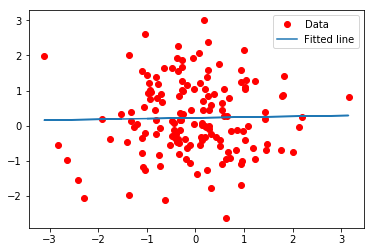

In [59]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % step_size == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:",'%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
        "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()